In [1]:
import pandas as pd # working with data
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.cluster import KMeans # K-means algorithm

plt.rcParams['figure.figsize'] = (20, 10)
sb.set_style('whitegrid')

# IMPORTING DATA



In [2]:
df = pd.read_csv('khachhang.csv')
df.set_index('Customer Id',inplace = True)

In [3]:
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,6.8
847,28,2,7,34,0.359,2.021,0.0,7.0
848,25,4,0,18,2.802,3.210,1.0,33.4


count    850.000000
mean      35.029412
std        8.041432
min       20.000000
25%       29.000000
50%       34.000000
75%       41.000000
max       56.000000
Name: Age, dtype: float64


C:\Users\Thuong\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


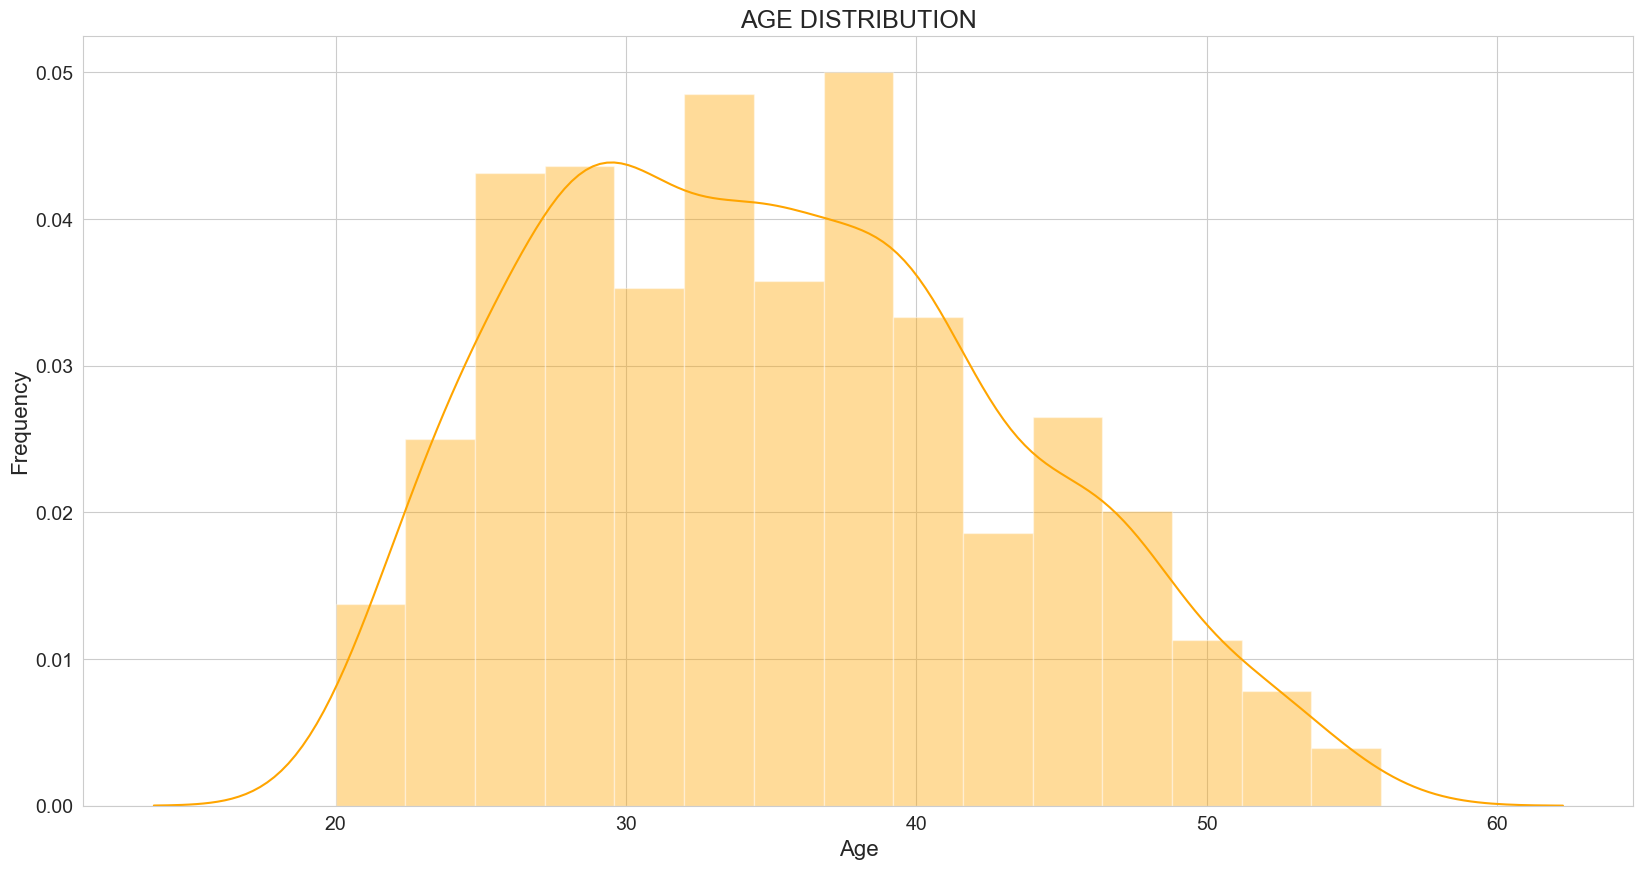

In [4]:
#phân tích dl
#Xem sự phân bố của các trường tuổi

print(cl(df['Age'].describe(), attrs = ['bold']))

sb.distplot(df['Age'], 
            color = 'orange')
plt.title('AGE DISTRIBUTION', 
          fontsize  = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Frequency', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()



C:\Users\Thuong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


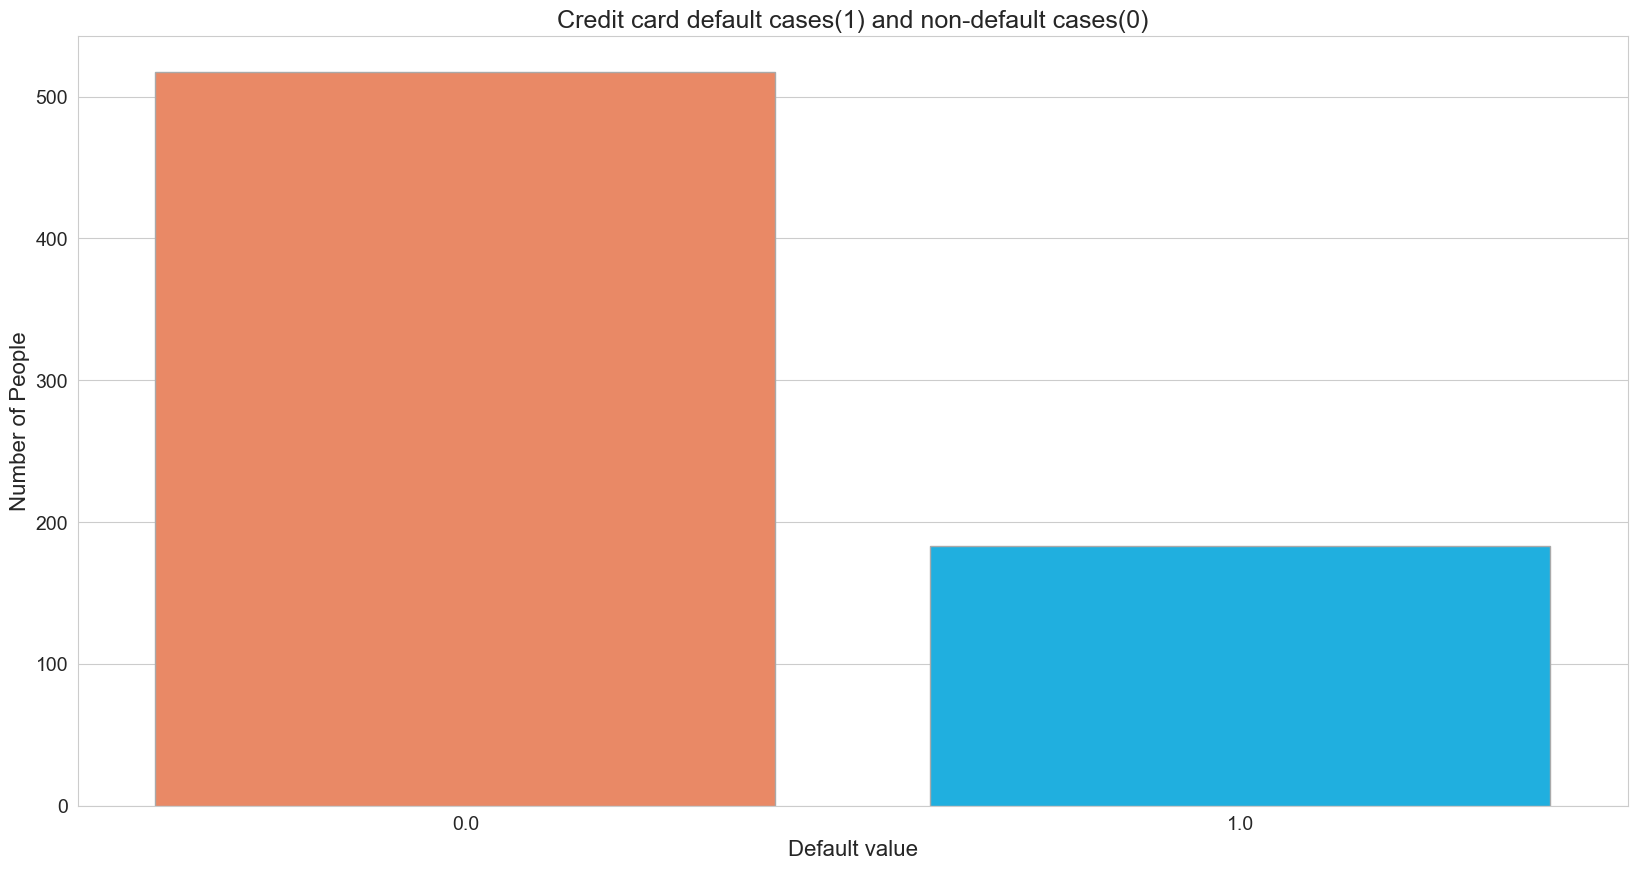

In [6]:
#chúng ta có thể xem có bao nhiêu khách hàng là mặc định (1) và bao nhiêu trong số họ không phải là (0) cũng là tỷ lệ phần trăm trường hợp mặc định.

sb.countplot(df['Defaulted'], 
             palette = ['coral', 'deepskyblue'], 
             edgecolor = 'darkgrey')
plt.title('Credit card default cases(1) and non-default cases(0)', 
          fontsize = 18)
plt.xlabel('Default value', 
           fontsize = 16)
plt.ylabel('Number of People', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('default_cases.png')
plt.show()

C:\Users\Thuong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


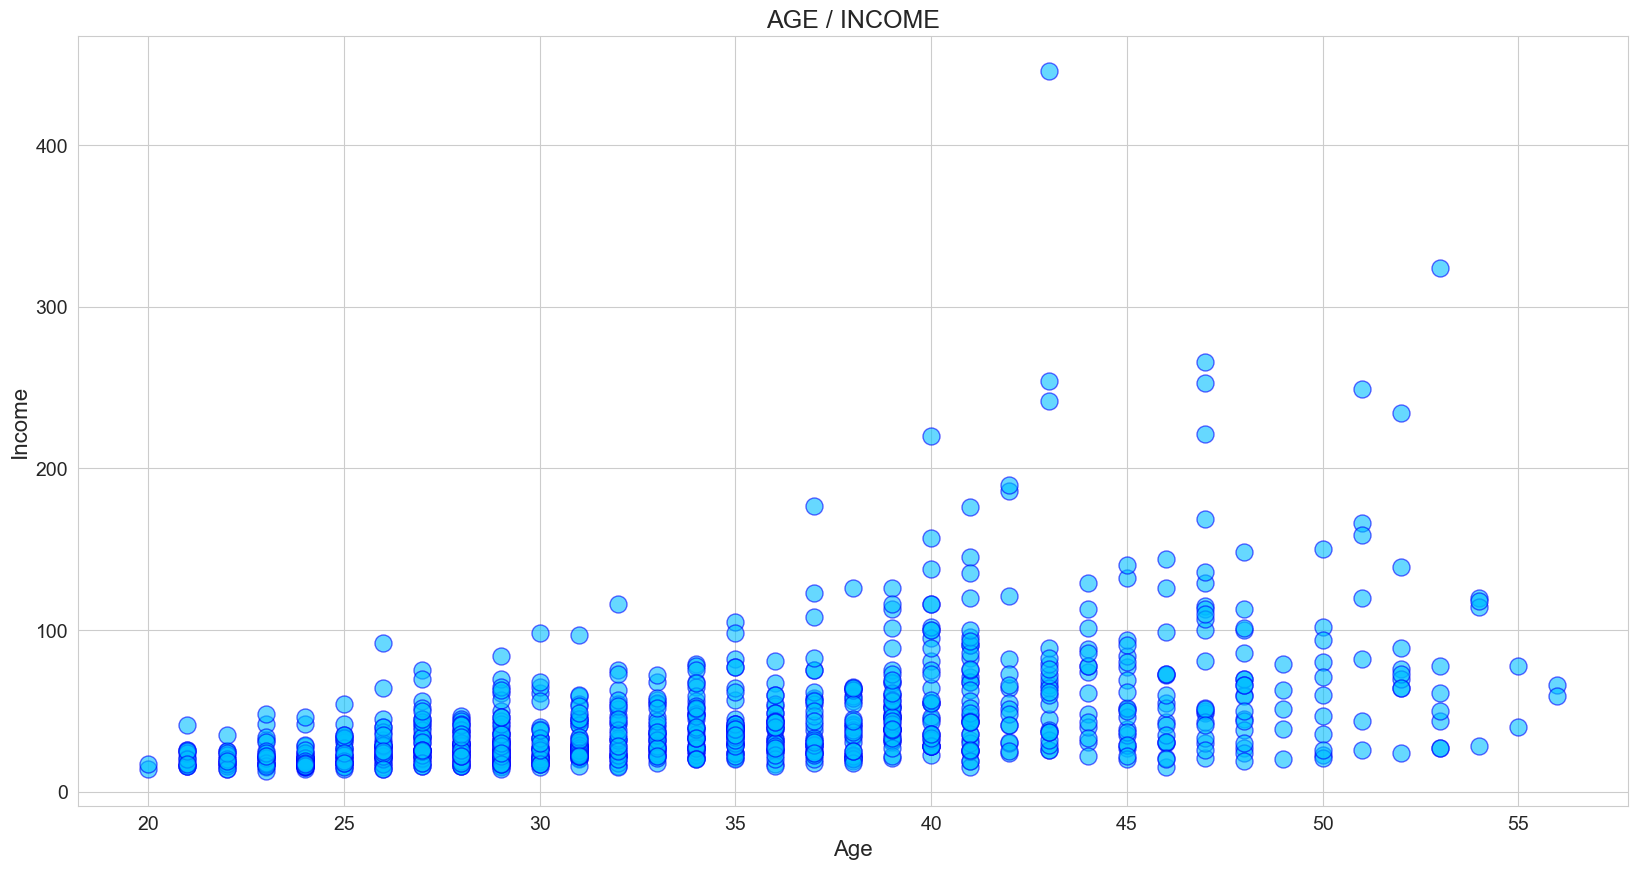

In [7]:
#phân tích sự tương quan giữa thu nhập và độ tuổi

sb.scatterplot('Age', 'Income', 
               data = df, 
               color = 'deepskyblue', 
               s = 150, 
               alpha = 0.6, 
               edgecolor = 'b')
plt.title('AGE / INCOME', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_income.png')
plt.show()

In [8]:
# DATA PROCESSING
#xử lý dữ liệu
X = df.values
X = np.nan_to_num(X)

sc = StandardScaler()

cluster_data = sc.fit_transform(X)
print(cl('Cluster data samples : ', attrs = ['bold']), cluster_data[:5])
df


Cluster data samples :  [[ 0.74291541  0.31212243 -0.37878978 -0.71845859 -0.68381116 -0.59048916
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  2.5737211   1.38432469  1.41447366  1.51296181
  -0.52379654  0.39138677]
 [-0.25251804  0.31212243  0.2117124   0.26803233  2.13414111  0.80170393
   1.90913822  1.59755385]
 [-0.75023477  0.31212243 -0.67404087 -0.71845859 -0.42164323 -0.75446707
  -0.52379654 -0.57652509]
 [ 1.48949049 -0.76634938  3.31184882  5.35624866  3.63890032  1.71609424
  -0.52379654 -0.44250653]]


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
846,27,1,5,26,0.548,1.220,NaN,6.8
847,28,2,7,34,0.359,2.021,0.0,7.0
848,25,4,0,18,2.802,3.210,1.0,33.4


In [9]:
# MODELING
#Phân cụm dữ liệu (xây dựng mô hình) với số cụm là 3 lặp tối đa 12 lần
clusters = 3
model = KMeans(init = 'k-means++', 
               n_clusters = clusters, 
               n_init = 12)
model.fit(X)

labels = model.labels_
print(cl(labels[:100], attrs = ['bold']))

[1 0 1 1 2 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 0 0 2 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [10]:
#thêm trường nhãn phân cụm cho dữ liệu
df['cluster_num'] = labels
df
print(cl(df.head(), attrs = ['bold']))


             Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
Customer Id                                                            
1             41    2               6      19      0.124       1.073   
2             47    1              26     100      4.582       8.218   
3             33    2              10      57      6.111       5.802   
4             29    2               4      19      0.681       0.516   
5             47    1              31     253      9.308       8.908   

             Defaulted  DebtIncomeRatio  cluster_num  
Customer Id                                           
1                  0.0              6.3            1  
2                  0.0             12.8            0  
3                  1.0             20.9            1  
4                  0.0              6.3            1  
5                  0.0              7.2            2  


In [11]:

# sử dụng phương thức 'groupby' để nhóm giá trị cụm và xem giá trị trung bình của từng thuộc tính 
#trong tập dữ liệu bằng phương pháp 'mean'.
#df['cluster_num'] = labels
#print(cl(df.head(), attrs = ['bold']))

print(cl(df.groupby('cluster_num').mean(), attrs = ['bold']))



                   Age       Edu  Years Employed      Income  Card Debt  \
cluster_num                                                               
0            41.333333  1.956284       15.256831   83.928962   3.103639   
1            32.964561  1.614792        6.374422   31.164869   1.032541   
2            45.388889  2.666667       19.555556  227.166667   5.678444   

             Other Debt  Defaulted  DebtIncomeRatio  
cluster_num                                          
0              5.765279   0.171233        10.724590  
1              2.104133   0.285185        10.094761  
2             10.907167   0.285714         7.322222  


C:\Users\Thuong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


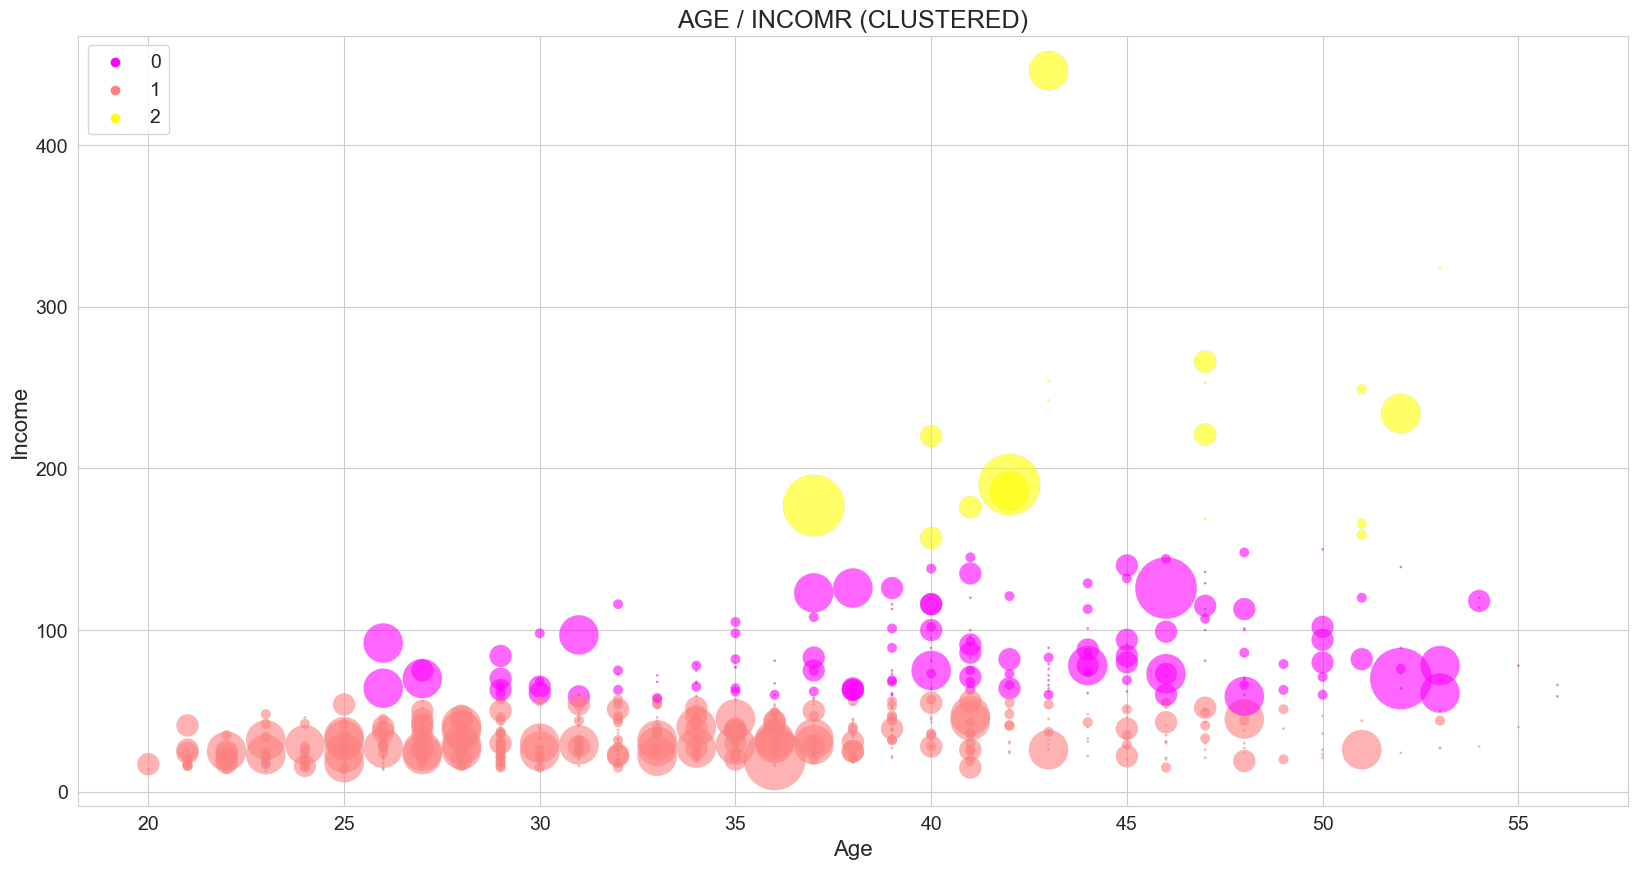

In [13]:
#vẽ biểu đồ các cụm trong không gian 2 chiều theo trường tuổi và thu nhập
area = np.pi * (df.Edu) ** 4

sb.scatterplot('Age', 'Income', 
               data = df, 
               s = area, 
               hue = 'cluster_num', 
               palette = 'spring', 
               alpha = 0.6, 
               edgecolor = 'darkgrey')
plt.title('AGE / INCOMR (CLUSTERED)', 
          fontsize = 18)
plt.xlabel('Age', 
           fontsize = 16)
plt.ylabel('Income', 
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 14)

plt.savefig('c_age_income.png')
plt.show()


C:\Users\Thuong\AppData\Local\Temp\ipykernel_3392\2636657436.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig,


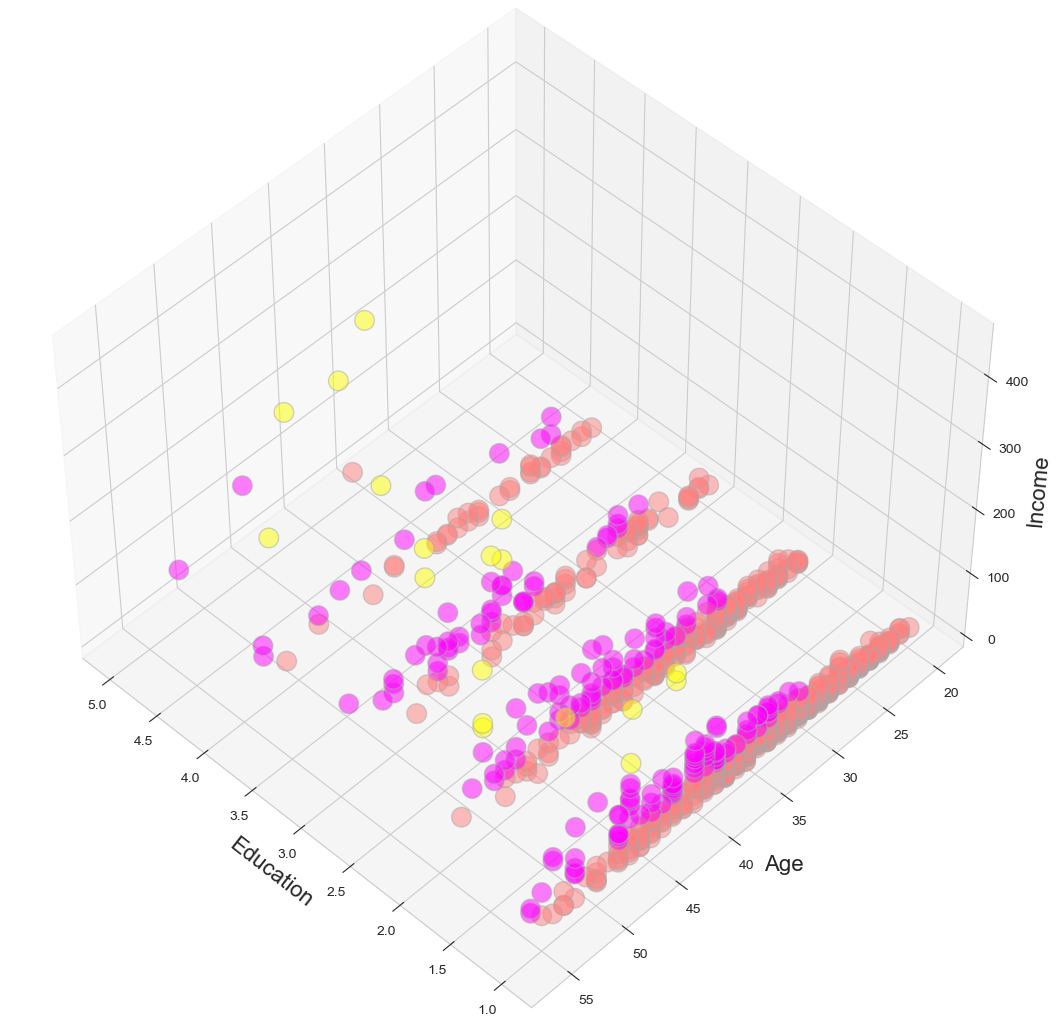

In [14]:
#vẽ biểu đồ theo không gian 3 chiều 
fig = plt.figure(1)
plt.clf()

ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 48, 
            azim = 134)

plt.cla()
ax.scatter(df['Edu'], df['Age'], df['Income'], 
           c = df['cluster_num'], 
           s = 200, 
           cmap = 'spring', 
           alpha = 0.5, 
           edgecolor = 'darkgrey')
ax.set_xlabel('Education', 
              fontsize = 16)
ax.set_ylabel('Age', 
              fontsize = 16)
ax.set_zlabel('Income', 
              fontsize = 16)

plt.savefig('3d_plot.png')
plt.show()